## 分析A/B测试



## 目录
- [简介](#intro)
- [I - 概率](#probability)
- [II - A/B 测试](#ab_test)
- [III - 回归](#regression)


<a id='intro'></a>
### 简介


    该项目是了解电子商务网站运行的 A/B 测试的结果。通过该 notebook 来帮助公司弄清楚是应该使用新的页面，还是保留旧的页面，或者应该将测试时间延长，之后再做出决定。


先导入库，然后开始任务

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` 现在，导入 `ab_data.csv` 数据，并将其存储在 `df` 中。 

a. 导入数据集，并在这里查看前几行：

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. 使用下面的单元格来查找数据集中的行数。

In [3]:
df.shape

(294478, 5)

c. 数据集中独立用户的数量。

In [4]:
df.shape[0] - df.duplicated('user_id').sum()

290584

d. 用户转化的比例。

In [5]:
df1 = df.query('group == "treatment"')

In [6]:
name = df1.query('landing_page== "new_page"').user_id.nunique() / (df1.query('landing_page == "old_page"').user_id.nunique()+df1.query('landing_page== "new_page"').user_id.nunique())
name

0.9866576133084366

e.  `new_page` 与 `treatment` 不一致的次数。

In [7]:
d = df[((df['group']== "treatment") == (df['landing_page']== "new_page")) ==False]
d.shape[0]


3893

In [8]:
df[((df['group']== "control") == (df['landing_page']== "old_page")) ==False].shape[0]


3893


f. 是否有任何行存在缺失值？

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

由以上检测可以看出,该数据集中没有缺失值

`2.` 对于 **treatment** 不与 **new_page** 一致的行或 **control** 不与 **old_page** 一致的行，我们不能确定该行是否真正接收到了新的或旧的页面。  

a. 现在，使用测试题的答案创建一个符合测试规格要求的新数据集。将新 dataframe 存储在 **df2** 中。

In [10]:
df2 =df[((df.group== 'treatment')&(df.landing_page== 'new_page'))|( (df.group== 'control')&(df.landing_page== 'old_page')) ]


In [11]:

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0


a.  **df2** 中有多少唯一的 **user_id**?

In [12]:
df2.shape[0] - df2.duplicated('user_id').sum()

290584

b.  **计算df2** 中重复值 

In [13]:
df2.duplicated('user_id').sum()

1

c. 重复的  **user_id** 的行信息

In [14]:
first = df2.groupby(df2.duplicated('user_id'))
first.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. 删除 **一个** 含有重复的 **user_id** 的行。

In [15]:
df2.drop_duplicates()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [16]:
df2.duplicated().sum()

0



a. 不管客户收到什么页面，单个用户的转化率是多少？


In [17]:
df2.query('converted == "1"').user_id.nunique() / df2.shape[0]

0.11959667567149027

b.假定一个用户处于 control 组中，他的转化率是多少？

In [18]:
Probability_control = df2.query('group == "control" and converted == "1"').count()[0] / df2.query('group == "control"').count()[0]
Probability_control

0.1203863045004612

c. 假定一个用户处于 `treatment` 组中，他的转化率是多少？


In [19]:
Probability_treatment = df2.query('group == "treatment" and converted == "1"').count()[0] / df2.query('group == "treatment"').count()[0]
Probability_treatment

0.11880724790277405

d. 一个用户收到新页面的概率是多少？


In [20]:
df2.query('landing_page == "new_page"').user_id.nunique() / df2.shape[0]


0.5000602233425676

一个用户收到旧页面的概率是多少？

In [21]:
df2.query('landing_page == "old_page"').user_id.nunique() / df2.shape[0]


0.4999363353235714

问题: 是否认为有证据表明一个页面可以带来更多的转化？


结论:
 1. 单个用户转换率达为 11.9%,而当用户处于treatment 组中时,转换率为 11.8% ,相比较于之前单个用户的转化率并没有太大的变化,故从前两部分结果来看:
   一个页面不能带来更多的转化

<a id='ab_test'></a>
### II - A/B 测试


`1.` 设定零假设和备择假设是什么？ 


零假设: Pold  >=  Pnew

备择假设: Pold  <  Pnew 

`2.` 假定在零假设中，不管是新页面还是旧页面， $p_{new}$ and $p_{old}$ 都具有等于 **转化** 成功率的“真”成功率，也就是说，  $p_{new}$ 与 $p_{old}$ 是相等的。此外，假设它们都等于**ab_data.csv** 中的 **转化** 率，新旧页面都是如此。  <br><br>

每个页面的样本大小要与 **ab_data.csv** 中的页面大小相同。  <br><br>

执行两次页面之间 **转化** 差异的抽样分布，计算零假设中10000次迭代计算的估计值。  <br><br>

a. 在零假设中，$p_{new}$ 的 **convert rate（转化率）** 是多少？


In [22]:
P_new = df2.query('converted == "1"').user_id.nunique() / df2.shape[0]
P_new

0.11959667567149027

b. 在零假设中， $p_{old}$  的 **convert rate（转化率）** 是多少？ <br><br>

In [23]:
P_old = df2.query('converted == "1"').user_id.nunique() / df2.shape[0]
P_old

0.11959667567149027

c.  $n_{new}$ 是多少？

In [24]:
number_new = df2.query('landing_page == "new_page"').user_id.nunique()
number_new

145310

d.  $n_{old}$?是多少？

In [25]:
number_old = df2.query('landing_page == "old_page"').user_id.nunique()
number_old

145274

e. 在零假设中，使用 $p_{new}$ 转化率模拟 $n_{new}$ 交易，并将这些 $n_{new}$ 1's 与 0's 存储在 **new_page_converted** 中。

In [26]:
new_page_converted=np.random.choice([0,1],size =number_new,p=[P_new,1-P_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 0])

f. 在零假设中，使用 $p_{old}$ 转化率模拟 $n_{old}$ 交易，并将这些  $n_{old}$ 1's 与 0's 存储在 **old_page_converted** 中。

In [27]:
old_page_converted=np.random.choice([0,1],size = number_old,p=[P_old,1-P_old])
old_page_converted

array([1, 0, 1, ..., 1, 1, 1])

g. 在 (e) 与 (f)中找到 $p_{new}$ - $p_{old}$ 模拟值。

In [28]:
new_page_converted.mean() - old_page_converted.mean()

-0.0013538285282299611

h. 使用**a. 到 g. ** 中的计算方法来模拟 10,000个 $p_{new}$ - $p_{old}$ 值，并将这 10,000 个值存储在 **p_diffs** 中。

In [29]:
p_diffs=[]
size = df2.shape[0]
for i in range(10000):   
    boot_new = np.random.choice([0,1],size =number_new,p=[P_new,1-P_new])
    boot_old = np.random.choice([0,1],size = number_old,p=[P_old,1-P_old])
    p_diffs.append(boot_new.mean() - boot_old.mean())

i. 绘制 **p_diffs** 直方图

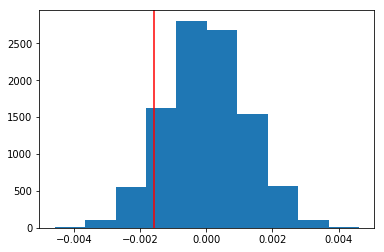

In [30]:
plt.hist(p_diffs)
plt.axvline(Probability_treatment - Probability_control,color = 'red')

j.  在**p_diffs**列表的数值中，有多大比例大于 **ab_data.csv** 中观察到的实际差值？

In [37]:
(p_diffs > Probability_treatment - Probability_control).sum() / len(p_diffs)

0.904

这个值是P值,代表的是支持大于ab_data.csv 的概率

计算每个页面的转化次数，以及每个页面的访问人数。使用 `n_old` 与 `n_new` 分别引证与旧页面和新页面关联的行数。

In [38]:
import statsmodels.api as sm

convert_old = df2.query('landing_page =="old_page" and converted == "1"').user_id.nunique()
convert_new = df2.query('landing_page =="new_page" and converted == "1"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
n_new = df2.query('landing_page == "new_page"').user_id.nunique()

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. 现在使用 `stats.proportions_ztest` 来计算检验统计量与 p-值。

In [39]:
sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative = 'smaller')

(1.3109241984234394, 0.9050583127590245)

In [40]:
from scipy.stats import norm
norm.ppf(1-0.05)

1.6448536269514722

1. 由上一问题可以得知; Z=1.31,P= 0.9050 ,由proportions_ztest文档可以得知,单尾Z临界值 = 1.644,所以由此得出计算出的Z分数和P值能意味着新旧页面的转化率
2. 由结果得知,上一问得出的结果和J,K中的不一致


<a id='regression'></a>
### III - 回归分析法之一


首先，需要为这个截距创建一个列（ 原文：column） ，并为每个用户收到的页面创建一个虚拟变量列。添加一个 **截距** 列，一个 **ab_page** 列，当用户接收 **treatment** 时为1， **control** 时为0。

In [41]:
page_dummies = pd.get_dummies(df['landing_page'])
df3 = df2.join(page_dummies)
df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [42]:
df3['intercept']=1
ab_page = pd.get_dummies(df['group'])
df4 = df3.join(ab_page)
df4.drop('old_page',axis=1)
df4.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,1,0



c. 使用 **statsmodels** 导入回归模型。 实例化该模型，并使用在 **b.** 中创建的2个列来拟合该模型，用来预测一个用户是否会发生转化。

In [44]:
lm = sm.Logit(df4['converted'], df4[['intercept', 'new_page']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-07-21 21:24 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
new_page     -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. 与 **ab_page** 关联的 p-值是多少？

P = 0.1897

不同的原因:Part2 中零假设是:旧页面好于新页面,备择假设是:新页面好于旧页面; 而Part3 中零假设是:自变量对转化率没有影响,备择假设是:自变量对转化率有影响,二者的零假设和备择假设不一致



f. 现在，考虑其他可能影响用户是否发生转化的因素。讨论为什么考虑将其他因素添加到回归模型中是一个不错的主意。在回归模型中添加附加项有什么弊端吗？


弊端:可能有产生方差膨胀因子而影响结果

g. 现在，除了测试不同页面的转化率是否会发生变化之外，还要根据用户居住的国家或地区添加一个 effect 项。需要导入 **countries.csv** 数据集，并将数据集合并在适当的行上。

这个国家项对转化有影响吗？

In [45]:
countries_df = pd.read_csv('countries.csv')
name = df3.join(countries_df.set_index('user_id'),on= 'user_id')
name[['CA','UK','US']] = pd.get_dummies(name['country'])

In [46]:
name = name.drop('US',axis =1)

In [47]:
name

,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept,country,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,US,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1,1,US,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1,1,US,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0


In [48]:
name['intercept']= 1
lm2 = sm.Logit(name['converted'], name[['intercept','CA','UK']])
results2 = lm2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-07-21 22:35 AIC:              212781.0880
No. Observations:   290585           BIC:              212812.8269
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3154  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5176  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7462  0.4555  -0.0161   0.0360
==================================================================

"""


页面与国家/地区的相互作用
```
df3['new_CA'] = df3['new_page'] * df3['CA']
df3['new_UK'] = df3['new_page'] * df3['UK']
```

In [49]:
name['new_CA'] = name['new_page'] * name['CA']
name['new_UK'] = name['new_page'] * name['UK']
name.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept,country,CA,UK,new_CA,new_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,US,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,US,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,US,0,0,0,0


In [51]:
lm2 = sm.Logit(name['converted'],name[['intercept','CA','UK','new_page','new_CA','new_UK']])
results2 = lm2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-07-21 22:35 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
new_page     -0.0206    0.0137    -1.5060  0.1321  -0.0474   0.0062
new_CA       -0.0469    0.0538    -0.8716  0.3834  -0.1523   0.0585
new_UK        0.0314    0.0266     1.1811  0.2375  -0.0207   0.0835
==================================================================

"""

由以上所获得的P值来看,CA,UK,new_page,new_CA,new_UK 这些数据均是大于 p=0.005的,故这些变量不具有统计学的显著性